In [1]:
import spacy
import timeit
import math
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from collections import Counter
from lxml import etree
from glob import glob
from unicodedata import normalize

In [2]:
%matplotlib inline

In [3]:
#nlp = spacy.load('fr_core_news_sm')
nlp = spacy.load('fr_core_news_md')
#nlp = spacy.load('fr_core_news_lg')
#nlp = spacy.load('fr_dep_news_trf')

In [4]:
def est_canon(tree):
    if tree.find(".//profileDesc") is not None:
        profil = tree.find(".//profileDesc")
        if profil.get("tag") == "canon":
            return True
        else:
            return False
    else:
        return False

In [5]:
def lemmatize(path):
    list_lemma = []
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tag == True:
            print("canon")
        else:
            print("non_canon")
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    clean_text = normalize("NFKD", paragraphe.text)
                    docs = nlp(clean_text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and "SPACE" and "X" and "SYM":
                            list_lemma.append(token.lemma_)
    return list_lemma, tag

In [6]:
def postaggize(path):
    list_pos = []
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tag == True:
            print("canon")
        else:
            print("non_canon")
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    clean_text = normalize("NFKD", paragraphe.text)
                    docs = nlp(clean_text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and "SPACE" and "X" and "SYM":
                            list_pos.append(token.pos_)
    return list_pos, tag

In [7]:
def bigrammize(list_lemma):
    list_bigram = []
    for indice_lemma in range(len(list_lemma)-1):
        bigram = list_lemma[indice_lemma]+'_'+list_lemma[indice_lemma+1]
        list_bigram.append(bigram)
    return list_bigram

In [8]:
def ngrammize(list_lemma, n):
    list_ngram = []
    for indice_lemma in range(len(list_lemma) - n):
        ngram = ""
        for i in range(n):
            soudure = "_" if i != n-1 else ""
            ngram+=list_lemma[indice_lemma+i]+soudure
        list_ngram.append(ngram)
    return list_ngram

test des fonctions

In [8]:
path_test = 'corpus_test/1829_Hugo-Victor_Le-dernier-jour-d-un-condamne.xml'

In [15]:
list_lemma_hugo = lemmatize(path_test)
list_bigram_hugo = bigrammize(list_lemma_hugo)    
print(list_bigram_hugo)

['il_n’', 'n’_y', 'y_avoir', 'avoir_en', 'en_tête', 'tête_de', 'de_première', 'première_édition', 'édition_de', 'de_ce', 'ce_ouvrage', 'ouvrage_publié', 'publié_d’', 'd’_abord', 'abord_sans', 'sans_nom', 'nom_d’', 'd’_auteur', 'auteur_que', 'que_le', 'le_quelque', 'quelque_ligne', 'ligne_qu’', 'qu’_on', 'on_aller', 'aller_lire', 'lire_il', 'il_y', 'y_avoir', 'avoir_deux', 'deux_manière', 'manière_de', 'de_se', 'se_rendre', 'rendre_compte', 'compte_de', 'de_l’', 'l’_existence', 'existence_de', 'de_ce', 'ce_livre', 'livre_ou', 'ou_il', 'il_y', 'y_avoir', 'avoir_avoir', 'avoir_en', 'en_effet', 'effet_un', 'un_liasse', 'liasse_de', 'de_papier', 'papier_jaune', 'jaune_et', 'et_inégal', 'inégal_sur', 'sur_lequel', 'lequel_on', 'on_avoir', 'avoir_trouvé', 'trouvé_enregistrées', 'enregistrées_un', 'un_à', 'à_un', 'un_le', 'le_dernière', 'dernière_pensée', 'pensée_d’', 'd’_un', 'un_misérable', 'misérable_ou', 'ou_il', 'il_s’', 's’_être', 'être_rencontré', 'rencontré_un

In [16]:
Counter(list_bigram_hugo).most_common(5)

[('de_le', 180),
 ('j’_avoir', 165),
 ('c’_être', 158),
 ('dans_le', 136),
 ('d’_un', 123)]

In [17]:
list_pos_hugo = postaggize(path_test)
list_bigram_pos_hugo = bigrammize(list_pos_hugo)    
print(list_bigram_pos_hugo)

['PRON_ADV', 'ADV_PRON', 'PRON_VERB', 'VERB_ADP', 'ADP_NOUN', 'NOUN_ADP', 'ADP_ADJ', 'ADJ_NOUN', 'NOUN_ADP', 'ADP_DET', 'DET_NOUN', 'NOUN_VERB', 'VERB_ADP', 'ADP_ADV', 'ADV_ADP', 'ADP_NOUN', 'NOUN_ADP', 'ADP_NOUN', 'NOUN_SCONJ', 'SCONJ_DET', 'DET_DET', 'DET_NOUN', 'NOUN_PRON', 'PRON_PRON', 'PRON_VERB', 'VERB_VERB', 'VERB_PRON', 'PRON_PRON', 'PRON_VERB', 'VERB_NUM', 'NUM_NOUN', 'NOUN_ADP', 'ADP_PRON', 'PRON_VERB', 'VERB_NOUN', 'NOUN_ADP', 'ADP_DET', 'DET_NOUN', 'NOUN_ADP', 'ADP_DET', 'DET_NOUN', 'NOUN_CCONJ', 'CCONJ_PRON', 'PRON_PRON', 'PRON_AUX', 'AUX_VERB', 'VERB_ADP', 'ADP_NOUN', 'NOUN_DET', 'DET_NOUN', 'NOUN_ADP', 'ADP_NOUN', 'NOUN_ADJ', 'ADJ_CCONJ', 'CCONJ_ADJ', 'ADJ_ADP', 'ADP_PRON', 'PRON_PRON', 'PRON_AUX', 'AUX_VERB', 'VERB_PRON', 'PRON_DET', 'DET_ADP', 'ADP_DET', 'DET_DET', 'DET_NOUN', 'NOUN_NOUN', 'NOUN_ADP', 'ADP_DET', 'DET_NOUN', 'NOUN_CCONJ', 'CCONJ_PRON', 'PRON_PRON', 'PRON_AUX', 'AUX_VERB', 'VERB_DET', 'DET_NOUN', 'NOUN_DET', 'DET_NOUN', 'NOUN_NOUN', 'NOUN_ADP', 'ADP_VERB

In [18]:
Counter(list_bigram_pos_hugo).most_common(5)

[('DET_NOUN', 4105),
 ('NOUN_ADP', 2330),
 ('PRON_VERB', 2111),
 ('ADP_DET', 1740),
 ('ADP_NOUN', 1716)]

In [13]:
list_ngram_hugo = ngrammize(list_lemma_hugo, 4)    
print(list_ngram_hugo)

['il_n’_y_avoir', 'n’_y_avoir_en', 'y_avoir_en_tête', 'avoir_en_tête_un', 'en_tête_un_première', 'tête_un_première_édition', 'un_première_édition_de', 'première_édition_de_ce', 'édition_de_ce_ouvrage', 'de_ce_ouvrage_publié', 'ce_ouvrage_publié_d’', 'ouvrage_publié_d’_abord', 'publié_d’_abord_sans', 'd’_abord_sans_nom', 'abord_sans_nom_d’', 'sans_nom_d’_auteur', 'nom_d’_auteur_que', 'd’_auteur_que_le', 'auteur_que_le_quelque', 'que_le_quelque_ligne', 'le_quelque_ligne_qu’', 'quelque_ligne_qu’_on', 'ligne_qu’_on_aller', 'qu’_on_aller_lire', 'on_aller_lire_il', 'aller_lire_il_y', 'lire_il_y_avoir', 'il_y_avoir_deux', 'y_avoir_deux_manière', 'avoir_deux_manière_de', 'deux_manière_de_se', 'manière_de_se_rendre', 'de_se_rendre_compte', 'se_rendre_compte_de', 'rendre_compte_de_l’', 'compte_de_l’_existence', 'de_l’_existence_de', 'l’_existence_de_ce', 'existence_de_ce_livre', 'de_ce_livre_ou', 'ce_livre_ou_il', 'livre_ou_il_y', 'ou_il_y_avoir', 'il_y_avoir_avoir', 'y_avoir

In [14]:
Counter(list_ngram_hugo).most_common(5)

[('le_peine_de_mort', 43),
 ('il_y_avoir_un', 25),
 ('qu’_il_y_avoir', 20),
 ('il_n’_y_avoir', 19),
 ('de_le_peine_de', 17)]

In [19]:
list_ngram_pos_hugo = ngrammize(list_pos_hugo, 4)    
print(list_ngram_pos_hugo)

['PRON_ADV_PRON_VERB', 'ADV_PRON_VERB_ADP', 'PRON_VERB_ADP_NOUN', 'VERB_ADP_NOUN_ADP', 'ADP_NOUN_ADP_ADJ', 'NOUN_ADP_ADJ_NOUN', 'ADP_ADJ_NOUN_ADP', 'ADJ_NOUN_ADP_DET', 'NOUN_ADP_DET_NOUN', 'ADP_DET_NOUN_VERB', 'DET_NOUN_VERB_ADP', 'NOUN_VERB_ADP_ADV', 'VERB_ADP_ADV_ADP', 'ADP_ADV_ADP_NOUN', 'ADV_ADP_NOUN_ADP', 'ADP_NOUN_ADP_NOUN', 'NOUN_ADP_NOUN_SCONJ', 'ADP_NOUN_SCONJ_DET', 'NOUN_SCONJ_DET_DET', 'SCONJ_DET_DET_NOUN', 'DET_DET_NOUN_PRON', 'DET_NOUN_PRON_PRON', 'NOUN_PRON_PRON_VERB', 'PRON_PRON_VERB_VERB', 'PRON_VERB_VERB_PRON', 'VERB_VERB_PRON_PRON', 'VERB_PRON_PRON_VERB', 'PRON_PRON_VERB_NUM', 'PRON_VERB_NUM_NOUN', 'VERB_NUM_NOUN_ADP', 'NUM_NOUN_ADP_PRON', 'NOUN_ADP_PRON_VERB', 'ADP_PRON_VERB_NOUN', 'PRON_VERB_NOUN_ADP', 'VERB_NOUN_ADP_DET', 'NOUN_ADP_DET_NOUN', 'ADP_DET_NOUN_ADP', 'DET_NOUN_ADP_DET', 'NOUN_ADP_DET_NOUN', 'ADP_DET_NOUN_CCONJ', 'DET_NOUN_CCONJ_PRON', 'NOUN_CCONJ_PRON_PRON', 'CCONJ_PRON_PRON_AUX', 'PRON_PRON_AUX_VERB', 'PRON_AUX_VERB_ADP', 'AUX_VERB_ADP_NOUN', 'VERB_ADP

In [20]:
Counter(list_ngram_pos_hugo).most_common(5)

[('NOUN_ADP_DET_NOUN', 658),
 ('DET_NOUN_ADP_NOUN', 566),
 ('ADP_DET_NOUN_ADP', 466),
 ('PRON_VERB_DET_NOUN', 411),
 ('DET_NOUN_ADP_DET', 383)]

indice de shannon

In [9]:
def shannon_diversity(list_bigram):
    # initialisation de l'indice de shannon
    shannon_sum = 0
    dict_conteur = Counter(list_bigram)
    # on recupere la proportion pi de chaque bigram par rapport à tous les autres bigrams
    for bigram in list_bigram: # set(list_bigram) pour éviter les doublons mais on mesure la redondance donc non ?
        prop = dict_conteur[bigram]/len(list_bigram)
        # on met à jour l'indice de shannon
        shannon_courant = prop * (math.log(prop, 2))
        shannon_sum += shannon_courant
    return round(shannon_sum * -1,2)

test sur tout le corpus des bigrammes de lemmes

In [113]:
canon = False
annee_canon = []
annee_archive = []
shannon_canon = []
shannon_archive = []
for doc in glob('corpus_master/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    date = doc_name.split("_")[0]
    print(doc_name)
    # execution des fonctions
    list_lemma, canon = lemmatize(doc)
    list_bigram = bigrammize(list_lemma)
    indice_shannon = shannon_diversity(list_bigram)
    print(indice_shannon)
    if canon:
        shannon_canon.append(indice_shannon)
        annee_canon.append(date)
    else:
        shannon_archive.append(indice_shannon)
        annee_archive.append(date)

1811_Chateaubriand-François-Rene-de_Oeuvres-completes-de-Chateaubriand-augmentees-d-un-essai-sur-la-vie-et-les-ouvrages-de-l-auteur-[par-Delandine-de-Saint-Esprit]-Volume-7-(1851-1852)
canon
492.6835781430968
1812_Kock-Paul-de_L-enfant-de-ma-femme
non_canon
192.31509119654396
1815_Gay-Sophie_Anatole-Vol-1
non_canon
143.99897565236137
1815_Gay-Sophie_Anatole-Vol-2
non_canon
150.60913097762884
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-1)
non_canon
115.76251818477286
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-2)
non_canon
137.39197979424011
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-4)
non_canon
151.21216035470314
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-1
non_canon
133.49828452577208
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-2
non_canon

202.59696431275972
1836_Girardin-Delphine-de_La-canne-de-M-de-Balzac
non_canon
147.90128386965492
1836_Gozlan-Leon_Le-notaire-de-Chantilly
non_canon
319.052032520916
1836_Igonette-T._Le-Valmont-de-la-jeunesse-ou-le-Triomphe-des-vertus-sur-les-egarements-de-la-raison-mis-a-la-portee-des-jeunes-gens-des-deux-sexes-(tome-2)
non_canon
189.16140427133075
1836_Igonette-T._Le-Valmont-de-la-jeunesse-ou-le-Triomphe-des-vertus-sur-les-egarements-de-la-raison-mis-a-la-portee-des-jeunes-gens-des-deux-sexes-par-T-Igonette-(tome-1)
non_canon
208.10749703165482
1836_Merimee-Prosper_La-Venus-d-Ille
canon
50.969012542152036
1836_Musset-Alfred-de_La-Confession-d-un-enfant-du-siecle-par-Alfred-de-Musset-nouvelle-edition-(1878)
canon
311.9381671693322
1836_Saintine-Xavier_Picciola
non_canon
217.7526296344421
1837_Aubert-de-Gaspe-Philippe_Le-chercheur-de-tresors
non_canon
88.27975328120237
1837_Blanchard-Pierre_Le-Nouvelliste-de-la-jeunesse
non_canon
177.29839961614903
1837_Nodier-Charles_Ines-de-Las-Sierr

34.54152227622161
1844_Balzac-Honore-de_Sarrasine
canon
48.17714823838972
1844_Balzac-Honore-de_Splendeurs-et-miseres-des-courtisanesFC
canon
513.3046516854997
1844_Chateaubriand-François-Rene-de_Vie-de-Rance
canon
222.99014326218028
1844_Doublet-Victor_Ezilda-ou-la-Zingara-oeuvre-historique-et-morale
non_canon
184.02217329132304
1844_Dumas-Alexandre_Fernande
canon
383.7300468415126
1844_Dumas-Alexandre_Les-Trois-Mousquetaires
canon
771.0785251853974
1844_Gay-Sophie_Ellenore-Volume-I
non_canon
316.38083466542116
1844_L-Ecuyer-Eugene_La-fille-du-brigand
non_canon
123.3522629115366
1844_L-Ecuyer-Eugene_Un-episode-de-la-vie-d-un-faux-devot
non_canon
82.39298735186487
1844_Reybaud-Henriette-Etiennette-Fanny_Rose
non_canon
134.26752975261485
1844_Sand-George_Andre
canon
211.5873911083652
1844_Tarbe-Des-Sablons-Michelle-Catherine-Josephine-Guespereau-Mme-Sebastien-Andre_Onesie-ou-les-Soirees-de-l-abbaye-suivie-de-Enguerrand-ou-le-Duel
non_canon
258.15496970664145
1844_Tavard-Eugene_Les-Effet

131.35083137877416
1848_Sand-George_François-le-champi
canon
219.07508966158434
1848_Sue-Eugene_Le-morne-au-diable
canon
318.29315500125034
1848_Woillez-Catherine_Edma-et-Marguerite-ou-les-Ruines-de-Chatillon-d-Azergues
non_canon
151.60884082159401
1849_Berthoud-Henry_Les-Filleules-de-Rubens-Tome-I
non_canon
167.38434873112126
1849_Chateaubriand-François-Rene-de_Memoires-d-Outre-Tombe-Tome-1
canon
360.73334160778603
1849_Chateaubriand-François-Rene-de_Memoires-d-Outre-Tombe-Tome-2
canon
400.87952409607766
1849_Chateaubriand-François-Rene-de_Memoires-d-Outre-Tombe-Tome-3
canon
372.6206645723058
1849_Chateaubriand-François-Rene-de_Memoires-d-Outre-Tombe-Tome-4
canon
325.4467417747093
1849_Chateaubriand-François-Rene-de_Memoires-d-Outre-Tombe-Tome-5
canon
520.6885517825992
1849_Dumas-Alexandre-Pere_Les-mariages-du-pere-Olifus
canon
215.87432851453397
1849_Dumas-Alexandre-Pere_Les-mille-et-un-fantomes.
canon
181.39666791015114
1849_Dumas-Alexandre_Le-Collier-de-la-reine
canon
807.655677063

108.89497192254511
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-4)
non_canon
110.38081761939472
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-5)
non_canon
68.20015828821735
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-7)
non_canon
115.38534290474465
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-8)
non_canon
82.98138241348539
1856_Feval-Paul-(pere)_Madame-Gil-Blas-souvenirs-et-aventures-d-une-femme-de-notre-temps-(Volume-9)
non_canon
91.99418092848731
1856_Gautier-Theophile_Avatar
canon
104.53495516923151
1856_Nerval-Gerard-de_Le-Marquis-de-Fayolle
canon
272.21808424992713
1856_Sales-Pierre_Le-sergent-Renaud-Aventures-parisiennes
non_canon
155.2513462604933
1856_Texier-Edmond-Auguste_Amour-et-finance
non_canon
185.10653091429043
1857_About-Edmond_Germaine
non_canon
242.65169826293615


126.97374563393798
1862_Chevalier-H-Emile_La-Capitaine
non_canon
152.53769443295064
1862_Chevalier-H-Emile_La-Tete-Plate
non_canon
222.71569867757202
1862_Chevalier-H-Emile_Les-Nez-Perces
non_canon
208.62147340764366
1862_Deslys-Charles_La-Loi-de-Dieu
non_canon
235.0833421522157
1862_Dumas-Alexandre-Pere_La-boule-de-neige
canon
147.1901626998592
1862_Dumas-Alexandre_La-princesse-Flora
canon
130.64426596976776
1862_Erckmann-Chatrian_Confidences-d-un-joueur-de-clarinette
non_canon
132.80250092407246
1862_Erckmann-Chatrian_Contes-des-bords-du-Rhin
non_canon
156.33391089901028
1862_Erckmann-Chatrian_L-Invasion-ou-le-Fou-Yegof
non_canon
227.39196695046084
1862_Fabre-Ferdinand_Les-Courbezon
non_canon
384.5123369074068
1862_Feval-Paul-(pere)_Jean-Diable-Tome-I
non_canon
440.09806443798624
1862_Feval-Paul-(pere)_Jean-Diable-Tome-II
non_canon
362.576603442821
1862_Feval-Paul-(pere)_Les-habits-noirs-Tome-I
non_canon
595.2350343799843
1862_Flaubert-Gustave_Salammbo
canon
365.86417607622843
1862_G

105.22588210906144
1867_Assollant-Alfred_Aventures-merveilleuses-mais-authentiques-du-capitaine-Corcoran-Deuxieme-partie
non_canon
164.8736812431651
1867_Assollant-Alfred_Aventures-merveilleuses-mais-authentiques-du-capitaine-Corcoran-Premiere-Partie
non_canon
145.83736547294544
1867_Belot-Adolphe_Le-drame-de-la-rue-de-la-paix
non_canon
285.93804117341693
1867_Claretie-Jules_Les-Femmes-de-proie-Mademoiselle-Cachemire
non_canon
196.09184066211293
1867_de-Coster-Charles_La-Legende-et-les-Aventures-heroiques-joyeuses-et-glorieuses-d-Ulenspiegel-et-de-Lamme-Goedzak
non_canon
510.1952977887967
1867_Dumas-Alexandre_Les-Blancs-et-les-Bleus
canon
660.344298830503
1867_Feval-Paul-(pere)_L-avaleur-de-sabres-Les-Habits-Noirs-Tome-VI
non_canon
484.86952916080304
1867_Gaboriau-Emile_Le-crime-d-Orcival
non_canon
420.7249843972956
1867_Gaboriau-Emile_Le-dossier-113
non_canon
442.74870369003276
1867_Gouraud-Julie_Le-petit-colporteur
non_canon
146.04882342244204
1867_Houssaye-Arsene_La-Pantoufle-de-Cen

15.573760837149987
1872_Daudet-Alphonse_Le-Pere-Achille
canon
16.728975539092886
1872_Dumas-Alexandre-Pere_La-fille-du-marquis-I
canon
207.85179923382336
1872_Dumas-Alexandre-Pere_La-fille-du-marquis-II
canon
205.6004491962383
1872_Dumas-Alexandre-Pere_Le-docteur-mysterieux-I
canon
247.3371495260483
1872_Dumas-Alexandre-Pere_Le-docteur-mysterieux-II
canon
242.3810591468504
1872_Dumas-Alexandre_Robin-Hood-le-prince-des-voleurs-I
canon
274.52213307139004
1872_Feuillet-Octave_Julia-de-Trecoeur
non_canon
89.92782451203237
1872_Feval-Paul-(pere)_Les-Compagnons-du-tresor-Les-Habits-Noirs-Tome-VII
non_canon
590.1681359140815
1872_Gaboriau-Emile_La-Degringolade-Tome-2
non_canon
389.98134025517714
1872_Gaboriau-Emile_La-Degringolade-Tome-3
non_canon
331.7454753373169
1872_Gouraud-Julie_Le-Livre-de-maman
non_canon
135.92167884664687
1872_Guise-Charles-de_Helika-Memoire-d-un-vieux-maitre-d-ecole
non_canon
189.82652766018202
1872_Lamothe-Alexandre-de_Le-Taureau-des-Vosges
non_canon
289.37921584491

123.173427876013
1876_Greville-Henry_Dosia
non_canon
142.43953946288718
1876_Greville-Henry_L-expiation-de-Saveli
non_canon
140.86507490042382
1876_Greville-Henry_La-princesse-Ogherof
non_canon
216.4371229232641
1876_Huysmans-Joris-Karl_Marthe-et-autres-nouvelles
canon
141.63271246079324
1876_Lacretelle-Henri-de_Les-Filles-de-Boheme
non_canon
362.1892760335819
1876_Lermina-Jules_Les-loups-de-Paris-Tome-2-Les-assises-rouges
non_canon
249.59752920750356
1876_Lermina-Jules_Les-Loups-de-Paris-Tome-I-Le-Club-des-morts
non_canon
354.59129082064345
1876_Malot-Hector_Ida-et-Carmelita
non_canon
274.09040340844456
1876_Malot-Hector_L-auberge-du-monde-par-Hector-Malot-Volume-2-(1875-1876)
non_canon
419.06946327352523
1876_Malot-Hector_L-Auberge-du-monde-Tome-1
non_canon
307.61361505621653
1876_Marechal-Marie_Le-Parrain-d-Antoinette-[Marguerite-au-prieure-Les-Deux-laides-L-Erreur-de-Madeleine.]
non_canon
224.34268037300257
1876_Mettais-Hippolyte-(Dr)_Les-Amours-d-un-tribun
non_canon
275.2472102357

272.6436260109383
1878_Stapleaux-Leopold_Le-Roman-d-un-pere
non_canon
206.81357931067063
1878_Ulbach-Louis_Monsieur-Paupe
non_canon
262.41312405981165
1878_Verne-Jules_Un-capitaine-de-quinze-ans
canon
370.16194409621113
1878_Zaccone-Pierre_La-Dame-d-Auteuil
non_canon
147.28415384010185
1878_Zola-Emile_Madeleine-Ferat
canon
373.24958969799377
1878_Zola-Emile_Une-page-d-amour
canon
317.69894223921597
1879_Aimard-Gustave_Le-fils-du-Soleil
non_canon
174.8202885524449
1879_Belot-Adolphe_La-Grande-Florine-suite-et-fin-des-Etrangleurs
non_canon
273.3500703764507
1879_Belot-Adolphe_Une-Joueuse
non_canon
156.00206654618918
1879_Berthet-Elie_Les-Cagnards-de-l-Hotel-Dieu-de-Paris
non_canon
310.01013950645967
1879_Bouvier-Alexis_La-Belle-Grelee
non_canon
749.5958686321928
1879_Bouvier-Alexis_La-femme-du-mort-Tome-I
non_canon
300.6335681088483
1879_Bouvier-Alexis_La-femme-du-mort-Tome-II
non_canon
194.22952026844698
1879_Cadol-Edouard_La-Diva
non_canon
294.0609787994586
1879_Cadol-Edouard_La-Grande

166.1064011647035
1881_Nervo-Robert-de-(Baron)_Bon-de-Nervo-Les-Memoires-de-mon-coupe
non_canon
104.72270761156197
1881_O-Monroy-Richard_Feux-de-paille
non_canon
161.20115804768378
1881_Pressense-Elise-de_Petite-mere
non_canon
270.0088063664408
1881_R-L._Un-amour-heureux
non_canon
158.86925908641743
1881_Racot-Adolphe_Le-Plan-d-Helene
non_canon
278.8963709245479
1881_Richebourg-Emile_Le-fils
non_canon
903.6312277559316
1881_Sand-George_Jeanne
canon
347.05097501220666
1881_Sauniere-Paul_La-Succession-Marignan
non_canon
288.31327044942867
1881_Stolz-Madame-de_Les-deux-reines
non_canon
128.21868548647348
1881_Tissot-Marcel_La-Veuve-d-Attila
non_canon
194.42764291014845
1881_Valles-Jules_L-Enfant
canon
392.36983777777453
1881_Valles-Jules_Le-Bachelier
canon
451.68473384756436
1881_Verne-Jules-_La-Jangada-huit-cent-lieues-sur-l-Amazone]
canon
292.3637316069821
1881_Vignon-Claude_Une-femme-romanesque-Adrien-Malaret-L-Exemple
non_canon
195.43133092690732
1882_Aimard-Gustave_Les-bandits-de-l-A

201.27575743821617
1884_Chavette-Eugene_La-conquete-d-une-cuisiniere-II-Le-tombeur-des-cranes
non_canon
239.98725053534534
1884_Chavette-Eugene_Le-saucisson-a-pattes-I-Fil-a-beurre
non_canon
297.70663057768604
1884_Chavette-Eugene_Le-saucisson-a-pattes-II-Le-plan-de-Cardeuc
non_canon
255.9448806596239
1884_Claretie-Jules_Le-Prince-Zilah-roman-parisien
non_canon
279.5219079924215
1884_Darien-Georges_Le-Voleur
non_canon
472.8199756143916
1884_Daudet-Alphonse_Sapho
canon
176.49081663411775
1884_Ferry-Gabriel_Le-coureur-des-bois-ou-les-chercheurs-d'or-1
non_canon
443.34718695889575
1884_Ferry-Gabriel_Le-coureur-des-bois-ou-les-chercheurs-d'or-2
non_canon
465.37213277023733
1884_France-Jeanne_Le-Mystere-d-un-vieux-chateau-par-G-de-La-Chataigneraie-(1884)
non_canon
172.64709201649288
1884_Goncourt-Edmond-de_Cherie
canon
319.7847264343177
1884_Gouraud-Julie_La-petite-maîtresse-de-maison
non_canon
4.247927513443588
1884_Gouraud-Julie_Le-Vieux-chateau
non_canon
111.60329316951321
1884_Guy-de-Ma

113.78845390510413
1888_Eekhoud-Georges_La-Nouvelle-Carthage
non_canon
289.0511760496621
1888_Gouraud-Julie_Quand-je-serai-grande
non_canon
155.49262646721652
1888_Greville-Henry_La-seconde-mere
non_canon
202.95680175577553
1888_Guy-de-Maupassant_Le-Rosier-de-Mme-Husson
canon
106.4826442552042
1888_Guy-de-Maupassant_Pierre-et-Jean
canon
162.92708834799998
1888_Larmandie-Leonce-de_Excelsior-Roman-parisien
non_canon
213.3499827647825
1888_Lesueur-Daniel_Amour-d-aujourd-hui
non_canon
264.6482081075842
1888_Malot-Hector_Conscience
non_canon
415.71069513340626
1888_Mirbeau-Octave_L-Abbe-Jules
canon
238.10944713041636
1888_Rachilde_La-Marquise-de-Sade
canon
233.91532635353997
1888_Rosny-aine-J-H_Les-Corneilles
non_canon
128.68153873185386
1888_Silvestre-Armand_Armand-Silvestre-Rose-de-mai-roman-inedit-(1888)
non_canon
180.1275655086826
1888_Stolz-Madame-de_Violence-et-bonte
non_canon
156.8583095957626
1888_Theuriet-Andre_Gertrude-et-Veronique
non_canon
218.40386851463361
1888_Verne-Jules_Deu

221.94945474771183
1893_Lemonnier-Camille_L-Homme-qui-tue-les-femmes
non_canon
21.000466768242827
1893_Lesueur-Daniel_Justice-de-femme
non_canon
227.11435023295599
1893_Loti-Pierre_Matelot
canon
120.48686586306897
1893_Maizeroy-Rene_La-fete
non_canon
105.3607258705187
1893_Malot-Hector_En-Famille
non_canon
379.4233870798961
1893_Metenier-Oscar_Barbe-bleue
non_canon
225.18516436987989
1893_Montegut-Maurice_Maurice-Montegut-Madame-Tout-le-monde-(1893)
non_canon
88.06993689372554
1893_Renard-Jules_Coquecigrues
canon
94.5343703464018
1893_Segur-Anatole-Henri-Philippe-de_Les-Enfants-de-Paris-Esquisse-d-apres-nature
non_canon
209.9776800002713
1893_Vadier-Berthe-(pseud-de-Celeste-Vitaline-Benoit)_Rose-et-Rosette-odyssee-d-une-trop-belle-poupee-(1893)
non_canon
144.2967900600699
1893_Verlaine-Paul_Mes-prisons
canon
43.98816946870465
1893_Vesco-Marie-Delorme-Mme-Leon_Les-Filles-du-clown-(Rita)
non_canon
132.95139731224884
1893_Zola-Emile_Le-docteur-Pascal
canon
374.5683217085293
1894_Allais-Al

236.32408240983543
1899_Loti-Pierre_La-chanson-des-vieux-epoux
canon
19.040349392930768
1899_Mirbeau-Octave_Le-Jardin-des-supplices
canon
171.86109769700772
1899_Noir-Louis_Au-Pole-et-autour-du-Pole-Dans-les-glaces
non_canon
92.23415184811718
1899_Noir-Louis_En-route-vers-le-Pole-Au-pays-des-boeufs-musques
non_canon
80.37743924794478
1899_Noir-Louis_Le-Trappeur-La-Renardiere-Au-Canada-la-tribu-des-Bois-Brules
non_canon
104.17444887300064
1899_Noir-Louis_Un-mariage-polaire-Au-Pole-Nord-chez-les-esquimaux
non_canon
95.17725002539895
1899_Noir-Louis_Une-chasse-a-courre-au-Pole-nord-Chez-les-esquimaux
non_canon
92.69412331969723
1899_Noir-Louis_Une-française-captive-chez-les-Peaux-Rouges-Chez-les-Sioux
non_canon
103.29845613534637
1899_Ohnet-Georges_Au-fond-du-gouffre
non_canon
297.23641313543374
1899_Verne-Jules_Le-Testament-d-un-excentrique
canon
391.33900576261647
1900_Allais-Alphonse_Ne-nous-frappons-pas
non_canon
100.335768318057
1900_Beaugrand-Honore_La-chasse-galerie
non_canon
83.08

48.91164728681394
1907_Leblanc-Maurice_Arsene-Lupin-gentleman-cambrioleur
non_canon
201.34811642588468
1907_Mael-Pierre_Le-Forban-noir
non_canon
211.65158814714417
1907_Moselly-Emile_Terres-lorraines
non_canon
272.7120292611621
1907_Segalen-Victor_Les-Immemoriaux
canon
166.1366978039213
1907_Vanderem-Fernand_La-victime
non_canon
72.71444201696022
1907_Zevaco-Michel_L-epopee-d-amour
non_canon
530.1441703502207
1907_Zevaco-Michel_Le-Capitan
non_canon
683.5631527694925
1907_Zevaco-Michel_Les-Pardaillan
non_canon
751.4299623948611
1908_Aicard-Jean_L-Illustre-Maurin
non_canon
379.63654267184256
1908_Aicard-Jean_Maurin-des-Maures
non_canon
334.59133964248986
1908_Barbusse-Henri_L-enfer
canon
281.38492342104485
1908_Bazin-Rene_Le-Mariage-de-Mademoiselle-Gimel-Dactylographe
non_canon
186.37151309906025
1908_Bovet-Marie-Anne-de_Apres-le-divorce
non_canon
179.87795298424467
1908_Delly_L'exilee
non_canon
199.69680589649056
1908_Delly_Une-femme-superieure
non_canon
177.73437656795792
1908_Dhanys-M

114.69706939562927
1913_Zevaco-Michel_Buridan-le-heros-de-la-tour-Nesle
non_canon
342.0570776162493
1913_Zevaco-Michel_Pardaillan-et-Fausta
non_canon
430.6164845259939
1914_Apollinaire-Guillaume_Les-trois-Don-Juan
canon
178.70262602780613
1914_Gide-Andre_Les-Caves-du-Vatican
canon
214.2689609406473
1914_Rolland-Romain_Colas-Breugnon
canon
209.56379243384742
1914_Roussel-Raymond_Locus-Solus
canon
212.06358554603094
1914_Zevaco-Michel_La-Reine-Sanglante
non_canon
296.8824318250899
1915_Bourget-Paul_Le-sens-de-la-mort
canon
187.1596052044338
1916_Ardel-Henri_Le-chemin-qui-descend
non_canon
186.60358497989603
1916_Barbusse-Henri_Le-Feu
canon
460.06843491063574
1916_Delly_La-fin-d'une-Walkyrie
non_canon
241.12073451225788
1916_Leroux-Gaston_Le-chateau-noir
non_canon
364.2316720633489
1916_Zevaco-Michel_Don-Juan
non_canon
396.8596603431714
1916_Zevaco-Michel_Le-Roi-amoureux
non_canon
284.98482705886795
1917_Alanic-Mathilde_L'essor-des-colombes
non_canon
131.6389076696619
1917_Bernede-Arthur_

135.1718765206306
1924_Le-Rouge-Gustave_Cinq-nouvelles-extraordinaires
non_canon
37.89772071523892
1924_Leblanc-Maurice_La-comtesse-de-Cagliostro
non_canon
240.05046642222806
1924_Leblanc-Maurice_La-dent-d-Hercule-Petitgris
non_canon
44.54755062137992
1924_Leroux-Gaston_La-machine-a-assassiner
non_canon
226.5275280256879
1924_Leroux-Gaston_La-poupee-sanglante
non_canon
234.6860401754364
1924_Radiguet-Raymond_Le-bal-du-comte-d'Orgel
non_canon
141.59248919758832
1925_Bazin-Rene_Le-ble-qui-leve
non_canon
277.05774081096234
1925_Cendrars-Blaise_L-or
canon
117.76638961851543
1925_Champsaur-Félicien_Dinah-Samuel
non_canon
150.37125033280805
1925_Crevel-Rene_Mon-corps-et-moi
canon
92.14661373862164
1925_Delly_Les-ombres
non_canon
146.52048434862024
1925_Genevoix-Maurice_Raboliot
non_canon
195.72805511750485
1925_Istrati-Panait_Les-recits-d-Adrien-Zograffi-III
non_canon
102.85339768904312
1925_Leroux-Gaston_Les-Tenebreuses-2
non_canon
282.3213690942293
1925_Leroux-Gaston_Les-Tenebreuses-I
non_

148.52832864162588
1932_Simenon-Georges_Le-Port-des-brumes
canon
195.40424417657118
1932_Simenon-Georges_Liberty-Bar
canon
146.3392570759777
1932_Veuzit-Max-du_Petite-comtesse
non_canon
234.16010331844515
1933_Colette_La-Chatte
canon
112.8993271610229
1933_Crevel-René_Les-pieds-dans-le-plat
canon
260.90165919181334
1933_Delly_La-lune-d'or
non_canon
437.0502913499467
1933_Duhamel-Georges_Le-notaire-du-Havre
canon
156.74036669501945
1933_Leblanc-Maurice_La-femme-aux-deux-sourires
non_canon
204.18300173522508
1933_Leblanc-Maurice_Victor-de-la-Brigade-mondaine
non_canon
179.89376720163307
1933_Malraux-Andre_La-Condition-Humaine
canon
275.4540400960299
1933_Nizan-Paul_Antoine-Bloye
canon
287.2367401814005
1933_Queneau-Raymond_Le-Chiendent
canon
275.0752390536915
1933_Simenon-Georges_L-Ecluse-n°1
canon
156.68190994175086
1933_Veuzit-Max-du_L'homme-de-sa-vie
non_canon
186.96551250896422
1933_Veuzit-Max-du_Vers-l'unique
non_canon
181.3937124262749
1934_Aragon-Louis_Les-Cloches-de-Bale
canon
36

118.45936218987042
1948_Delly_La-rose-qui-tue
non_canon
122.90207271197447
1948_Leroux-Gaston_Cheri-Bibi-et-Cecily
non_canon
333.32088519307
1948_Simenon-Georges_Les-vacances-de-Maigret
canon
213.74538712378262
1948_Veuzit-Max-du_Sainte-Sauvage
non_canon
249.7576170947476
1948_Vian-Boris_Et-on-tuera-tous-les-affreux
canon
233.61372007028518
1949_Benoit-Pierre_La-dame-de-l-ouest
non_canon
235.81254301645453
1949_Blondin-Antoine_L-Europe-buissoniere
non_canon
290.44085360169595
1949_Delly_La-villa-des-serpents
non_canon
112.96053882189877
1949_Simenon-Georges_La-premiere-enquete-de-Maigret
canon
223.2107838276651
1949_Simenon-Georges_Maigret-chez-le-coroner
canon
200.5599366535636
1949_Simenon-Georges_Maigret-et-la-vieille-dame
canon
217.9535476480138
1949_Simenon-Georges_Mon-ami-Maigret
canon
213.3973289404546
1950_Bernanos-Georges_Un-mauvais-reve
canon
175.0825623241543
1950_Delly_Aurore-de-Brusfeld
non_canon
142.6303710679281
1950_Delly_Folie-de-sages
non_canon
108.8259522082624
1950_

141.3853466976562
1956_Simenon-Georges_Un-echec-de-Maigret
canon
177.3367331548628
1956_Thomas-Henri_La-nuit-de-Londres
canon
157.2579221465689
1957_Boileau-Narcejac_Les-magiciennes
non_canon
159.51048479800903
1957_Celine-Louis-Ferdinand_D-un-chateau-L-autre
canon
313.05056052853024
1957_Delly_Berengere-fille-de-roi
non_canon
211.15686030673095
1957_Delly_Le-sphinx-d'emeraude
non_canon
208.24864753415542
1957_Malet-Leo_Boulevard-ossements
non_canon
190.6447263285968
1957_Nemirovsky-Irene_Les-Feux-de-l-automne
non_canon
210.82772980061443
1957_Pagnol-Marcel_La-Gloire-de-mon-pere
non_canon
193.6989809086088
1957_San-Antonio_J-ai-peur-des-mouches
non_canon
137.0521006857399
1957_San-Antonio_La-tombola-des-voyous
non_canon
139.59239197491556
1957_San-Antonio_Les-anges-se-font-plumer
non_canon
135.6456043105059
1957_Simenon-Georges_Maigret-s-amuse
canon
182.7425842472796
1957_Simenon-Georges_Maigret-voyage
canon
174.4023270648345
1957_Vailland-Roger_La-Loi
non_canon
337.6058258869777
1958_

127.40122809062554
1968_Gary-Romain_La-Tete-coupable
canon
352.95841207762874
1968_Guy-Des-Cars_La-revoltee
non_canon
621.3253357138027
1968_Modiano-Patrick_La-Place-de-l-etoile
canon
96.99443347356153
1968_San-Antonio_Bravo-docteur-Beru
non_canon
178.77306706193204
1968_San-Antonio_Un-elephant-ça-trompe
non_canon
159.301592776385
1968_San-Antonio_Viva-Bertaga
non_canon
177.90620927530986
1968_San-Antonio_Zero-pour-la-question
non_canon
185.1486924724484
1968_Simenon-Georges_L-ami-d-enfance-de-Maigret
canon
201.13763303146195
1968_Simenon-Georges_Maigret-a-Vichy
canon
178.86565787724294
1968_Simenon-Georges_Maigret-hesite
canon
194.0924324942015
1968_Simonin-Albert_Le-Hotu
non_canon
530.7124321608308
1968_Yourcenar-Marguerite_L-Oeuvre-Au-Noir
canon
419.0936753632813
1969_Magali_La-prisonniere
non_canon
127.56784089981213
1969_Marceau-Felicien_Creezy
non_canon
144.34095745554342
1969_Mauriac-Francois_Un-adolescent-d-autrefois
canon
254.63984300558064
1969_Modiano-Patrick_La-Ronde-De-Nui

157.85212987855132
1980_Tournier-Michel_Gaspard-Melchior-Et-Balthazar
canon
205.94697134640637
1981_Bouvier-Nicolas_Le-poisson-scorpion
non_canon
93.7214183840758
1981_Delly_L'heritage-de-Cendrillon
non_canon
184.68252682690928
1981_Delly_Ma-robe-couleur-du-temps
non_canon
131.2305980929659
1981_Ernaux-Annie_La-femme-gelee
canon
167.43000798108343
1981_Gary-Romain_Vie-et-mort-d-Emile-Ajar
canon
29.08407568815945
1981_Robbe-Grillet-Alain_Djinn
canon
87.79374873760786
1981_Simon-Claude_Les-Georgiques
canon
364.0280345103489
1981_Villard-Marc_Corvette-de-nuit
non_canon
79.91349551087237
1982_A.D.G._On-n-est-pas-des-chiens
non_canon
109.44477643502033
1982_Barjavel-Rene_La-Tempete
non_canon
187.79530346387006
1982_Chessex-Jacques_Judas-le-transparent
non_canon
179.97350002037888
1982_Daeninckx-Didier_Mort-Au-Premier-Tour
canon
182.938510452106
1982_Jonquet-Thierry_Memoire-en-cage
non_canon
175.3895542087964
1982_Laurent-Jacques_Les-dimanches-de-Mademoiselle-Beaunon
non_canon
146.6480396904

141.42501751990073
1995_Ferney-Alice_L-elegance-des-veuves
non_canon
111.50447239257643
1995_Gailly-Christian_Be-Bop
non_canon
118.7651122880163
1995_Kristof-Agota_Hier
non_canon
136.14193957010957
1995_Laurens-Camille_Philippe
canon
41.3478567912161
1995_Millet-Richard_La-gloire-des-pythre
canon
470.25028168269233
1995_Nothomb-Amelie_Les-catilinaires
canon
155.01313984133935
1995_Sarraute-Nathalie_Ici
canon
159.85699536231803
1995_Vargas-Fred_Debout-les-morts
non_canon
247.0455240230981
1996_Bergounioux-Pierre_La-mort-de-Brune
canon
120.76516313773367
1996_Bouraoui-Nina_Le-Bal-des-murenes
non_canon
97.55735700442355
1996_Daeninckx-Didier_Nazis-dans-le-metro
canon
125.8782241356209
1996_Darrieussecq-Marie_Truismes
canon
197.59205310490015
1996_Despentes-Virginie_Les-Chiennes-savantes
canon
263.53416282680615
1996_Gailly-Christian_L-Incident
non_canon
115.59954787097573
1996_Michon-Pierre_La-Grande-Beune
canon
54.512898377083104
1996_Michon-Pierre_Le-Roi-du-bois
canon
26.36758268227409


354.5561823924101
2005_Kristof-Agota_C-est-egal
non_canon
75.75340489680312
2005_Millet-Richard_le-gout-des-femmes-laides
canon
183.53983327083512
2005_Modiano-Patrick_Un-pedigree
canon
92.50382896173161
2005_Musso-Guillaume_Sauve-moi
non_canon
294.01149188218744
2005_Nothomb-Amelie_Acide-sulfurique
canon
113.487517480691
2005_Quignard-Pascal_Les-Paradisiaques
canon
203.51574171484629
2006_Bergounioux-Pierre_La-fin-du-monde-en-avançant
canon
40.02947684684648
2006_Daeninckx-Didier_Itineraire-d-un-salaud-ordinaire
canon
273.8714422632571
2006_Echenoz-Jean_Ravel
canon
78.2297107076402
2006_Ferney-Alice_Les-Autres
non_canon
359.86973239837596
2006_Jouet-Jacques_L-amour-comme-on-l-apprend-a-l-Ecole-hoteliere
non_canon
553.3272690658808
2006_Jourde-Pierre_L-Heure-et-l-ombre
non_canon
252.12153367555482
2006_Lemaitre-Pierre_Travail-Soigne
non_canon
350.95383734122197
2006_Millet-Richard_Devorations
canon
311.91703739478356
2006_Nimier-Marie_La-Reine-du-silence
non_canon
121.90375158860272
20

387.80380853865387
2012_Jouet-Jacques_La-seule-fois-de-l-amour
non_canon
75.95987590624583
2012_Jourde-Pierre_Le-Marechal-absolu
non_canon
835.9351666785616
2012_Kerangal-Maylis-de_Tangente-vers-l-est
canon
78.6298590440374
2012_Leger-Nathalie_Supplement-a-la-vie-de-Barbara-Loden
non_canon
86.355135378022
2012_Modiano-Patrick_L-herbe-des-nuits
canon
184.60892806919594
2012_Nothomb-Amelie_Barbe-bleue
canon
120.97020475394464
2012_Perec-Georges_Le-Condottiere
canon
161.98793488234185
2012_Quignard-Pascal_Les-desarçonnes
canon
232.5698947470566
2012_Riboulet-Mathieu_Les-oeuvres-de-misericorde
non_canon
117.09975377017301
2012_Roger-Marie-Sabine_Bon-retablissement
non_canon
140.70781104632277
2012_Winckler-Martin_En-souvenir-d-Andre
non_canon
155.88684768384053
2013_Abecassis-Eliette_Le-palimpseste-d-Archimede
non_canon
330.2593670128117
2013_Begaudeau-François_Deux-singes-ou-ma-vie-politique
non_canon
286.2566865851428
2013_Begaudeau-François_Le-moindre-mal
non_canon
57.87019262132433
201

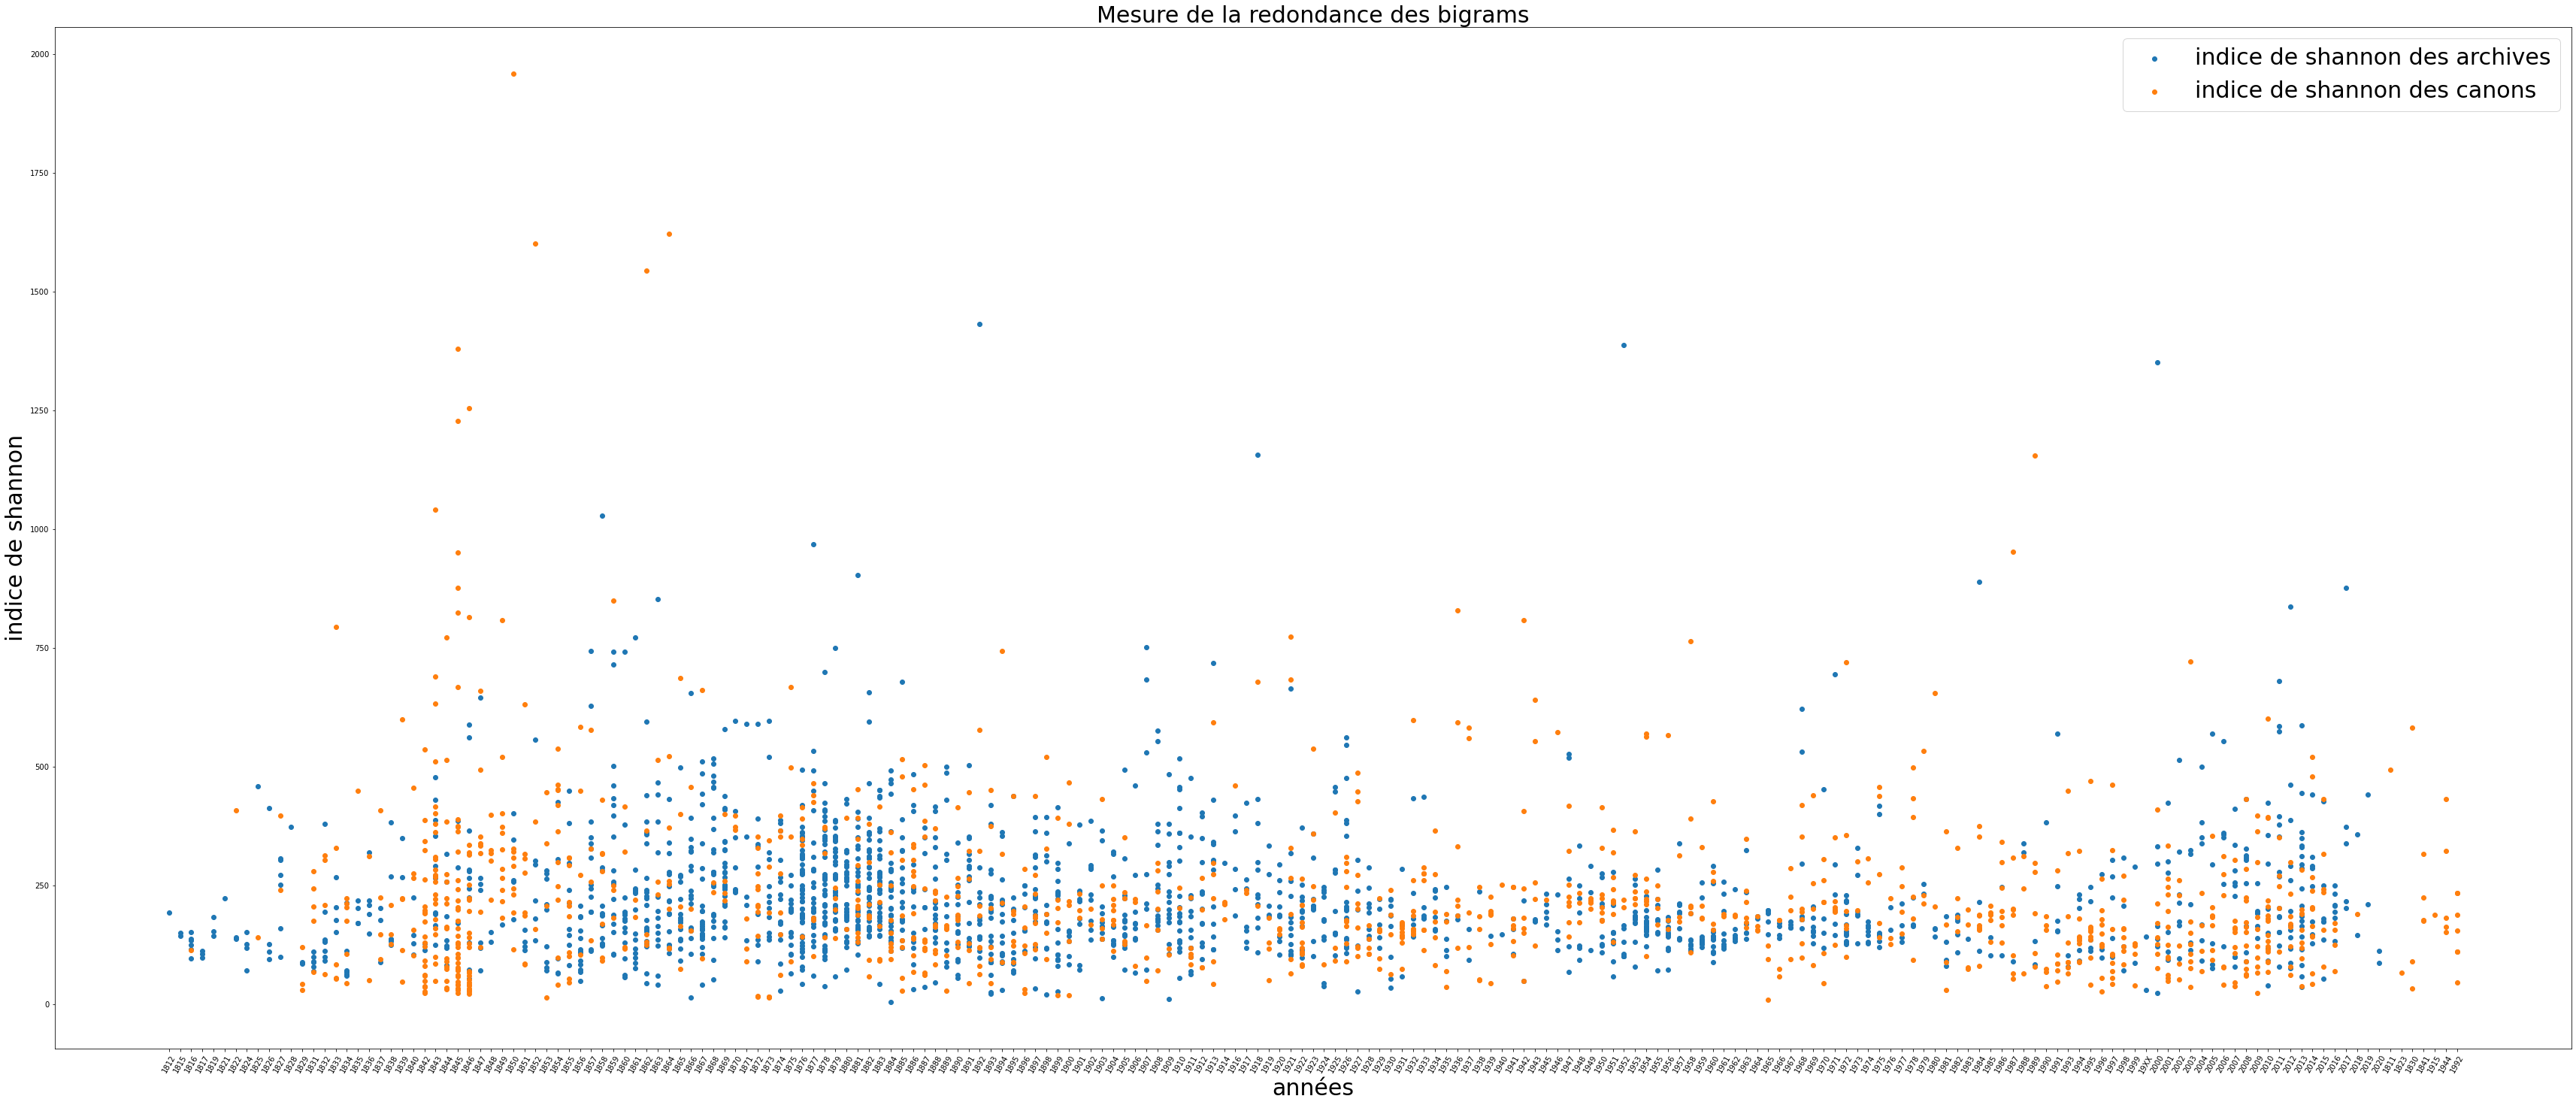

In [114]:
plt.figure(figsize=(60,25))
plt.scatter(annee_archive, shannon_archive, label = 'indice de shannon des archives')
plt.scatter(annee_canon, shannon_canon, label = 'indice de shannon des canons')
plt.ylabel('indice de shannon', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance des bigrams', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [140]:
s_canon = pd.Series(shannon_canon, name='shannon_canon')
s_archive = pd.Series(shannon_archive, name='shannon_archive')
shannon_df = pd.concat([s_canon, s_archive], axis=1)
shannon_df

,shannon_canon,shannon_archive
0,492.683578,192.315091
1,113.751778,143.998976
2,407.509420,150.609131
3,66.859658,115.762518
4,140.593648,137.391980
...,...,...
1803,NaN,144.426135
1804,NaN,441.166073
1805,NaN,210.529561
1806,NaN,86.158304


In [141]:
shannon_df.to_csv(r'C:\Users\jeanb\Desktop\results_shannon.csv', index = False, header=True)

test des bigrammes de pos

In [13]:
canon = False
annee_canon = []
annee_archive = []
shannon_canon_pos = []
shannon_archive_pos = []
for doc in glob('corpus_master/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    date = doc_name.split("_")[0]
    print(doc_name)
    list_bigram_pos, canon = postaggize(doc)
    indice_shannon = shannon_diversity(list_bigram_pos)
    print(indice_shannon)
    if canon:
        shannon_canon_pos.append(indice_shannon)
        annee_canon.append(date)
    else:
        shannon_archive_pos.append(indice_shannon)
        annee_archive.append(date)

1812_Kock-Paul-de_L-enfant-de-ma-femme
non_canon
19426.8
1815_Gay-Sophie_Anatole-Vol-1
non_canon
10942.43
1815_Gay-Sophie_Anatole-Vol-2
non_canon
11668.94
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-1)
non_canon
11609.22
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-2)
non_canon
13066.78
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-4)
non_canon
13839.35
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-1
non_canon
15086.59
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-2
non_canon
13323.1
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes-Tome-3
non_canon
11479.73
1816_Constant-Benjamin_Adolphe
canon
10843.13
1817_Barthelemy-Hadot-Marie-Adelaide_Les-venitiens-ou-Le-capitaine-français-(Tome-1)
non_canon
10362.01
1817_Bart

24499.28
1837_Sand-George_La-derniere-Aldini
canon
23782.62
1837_Sand-George_Les-maitres-mosaistes
canon
16286.35
1837_Sand-George_Mauprat
canon
43972.06
1838_Corbiere-Edouard_Les-Trois-Pirates
non_canon
14767.07
1838_Dumas-Alexandre_Le-Capitaine-Paul
canon
23351.53
1838_Dumas-Alexandre_Othon-l-Archer
canon
12160.62
1838_Dupin-Antoinette_Comment-tout-finit-(tome-1)
non_canon
14981.73
1838_Dupin-Antoinette_Comment-tout-finit-par-Mme-A-Dupin-Tome-2
non_canon
15822.27
1838_Gautier-Theophile_Fortunio
canon
17653.24
1838_Karr-Alphonse_Genevieve
non_canon
27465.28
1838_Kock-Paul-de_Madeleine
non_canon
35170.06
1838_Wey-Francis_Les-enfants-du-marquis-de-Ganges-ou-Les-expiations
non_canon
18401.98
1839_Borel-Petrus_Madame-Putiphar
non_canon
50986.8
1839_Dumas-Alexandre-Pere_Blanche-de-Beaulieu-et-autres-histoires
canon
25110.92
1839_Dumas-Alexandre_Acte
canon
25733.19
1839_Dumas-Alexandre_Aventures-de-Lyderic
canon
9666.16
1839_Karr-Alphonse_Clotilde
non_canon
25869.81
1839_Stendhal_La-Chartre

26324.64
1845_Dumas-Alexandre-Pere_Le-batard-de-Mauleon-III
canon
20696.4
1845_Dumas-Alexandre_Histoire-d-un-Casse-noisette
canon
15714.76
1845_Dumas-Alexandre_La-Reine-Margot
canon
76564.59
1845_Dumas-Alexandre_Le-Chevalier-de-Maison-Rouge
canon
48172.57
1845_Dumas-Alexandre_Le-Comte-de-Monte-Cristo
canon
177183.82
1845_Dumas-Alexandre_Les-freres-Corses
canon
11710.62
1845_Dumas-Alexandre_Une-fille-du-Regent
canon
44896.27
1845_Dumas-Alexandre_Vingt-ans-apres
canon
104766.16
1845_Feval-Paul-(pere)_Les-Contes-de-nos-peres
non_canon
22126.93
1845_Flaubert-Gustave_La-premiere-education-sentimentale
canon
37825.54
1845_Karr-Alphonse_Voyage-autour-de-mon-jardin
non_canon
38364.92
1845_Merimee-Prosper_Carmen
canon
7341.64
1845_Sand-George_Le-meunier-d-Angibault
canon
42155.03
1845_Sand-George_Teverino
canon
19534.13
1845_Sue-Eugene_La-coucaratcha-Tome-I
canon
14178.39
1845_Sue-Eugene_La-coucaratcha-Tome-II
canon
13863.76
1845_Sue-Eugene_La-coucaratcha-Tome-III
canon
12244.62
1845_Sue-Eugene

non_canon
19909.43
1852_Souvestre-Emile_Dans-la-prairie
non_canon
14785.67
1853_Chamfleury_Les-souffrances-du-professeur-Delteil
non_canon
22795.22
1853_Champfleury_Les-aventures-de-mademoiselle-Mariette
non_canon
30494.54
1853_Chavannes-de-La-Giraudiere-Hippolyte-de_Les-Petits-voyageurs-en-Californie
non_canon
7994.05
1853_Desnoiresterres-Gustave_Un-amour-en-diligence
non_canon
7326.11
1853_Du-Camp-Maxime_Memoires-d'un-suicide
non_canon
31604.49
1853_Dumas-Alexandre-Pere_Les-drames-de-la-mer
canon
19579.78
1853_Gozlan-Leon_Les-Vendanges
non_canon
36533.22
1853_Karr-Alphonse_Les-Femmes
non_canon
19855.57
1853_Poulain-Jules_Le-Dartmoor-ou-les-Deux-soeurs-scenes-de-la-vie-anglaise
non_canon
14221.04
1853_Sand-George_La-fauvette-du-docteur
canon
450.7
1853_Sand-George_Les-maitres-sonneurs
canon
46817.23
1853_Sue-Eugene_Les-Mysteres-du-peuple-Tome-IX
canon
39527.49
1853_Zaccone-Pierre_Eric-le-mendiant
non_canon
7998.43
1854_Barbey-d-Aurevilly-Jules_L-ensorcelee
canon
28392.99
1854_Barthele

16103.23
1859_Souvestre-Emile_Les-reprouves-et-les-elus-Tome-1
non_canon
31645.08
1859_Souvestre-Emile_Les-reprouves-et-les-elus-Tome-2
non_canon
36234.73
1859_Strub-Florence_L-Ermite-de-Vallombreuse-suivi-de-Madeleine
non_canon
12021.63
1859_Ulbach-Louis_Pauline-Foucault
non_canon
46399.32
1860_Assollant-Alfred_Histoire-fantastique-du-celebre-Pierrot
non_canon
8869.97
1860_Dumas-Alexandre-Pere_Jacquot-sans-Oreilles
canon
10692.48
1860_Dumas-Alexandre-Pere_L-Horoscope
canon
31142.94
1860_Dumas-Alexandre-Pere_Une-aventure-d-amour
canon
12082.21
1860_Erckmann-Chatrian_Contes-fantastiques
non_canon
25160.04
1860_Feval-Paul-(pere)_Le-Chevalier-Tenebre
non_canon
14016.34
1860_Feval-Paul-(pere)_Le-Medecin-bleu
non_canon
4955.27
1860_Goncourt-Edmond-de-Goncourt-Jules-de_Charles-Demailly
canon
42444.99
1860_Noriac-Jules_La-betise-humaine
non_canon
15208.42
1860_Pechmeja-Ange_Rosalie-nouvelle
non_canon
23135.0
1860_Ponson-du-Terrail-Pierre_Les-Chevaliers-du-Clair-de-Lune
non_canon
50383.01
1860

34309.68
1865_Scholl-Aurelien_Les-Gens-tares
non_canon
15340.73
1865_Verne-Jules_De-la-Terre-a-la-Lune
canon
20232.38
1865_ Verne-Jules_Les-Forceurs-de-blocus
canon
6888.52
1866_Chevalier-H-Emile_La-fille-des-indiens-rouges
non_canon
24354.14
1866_Erckmann-Chatrian_Le-Blocus
non_canon
24385.33
1866_Feuillet-Octave_Monsieur-de-Camors
non_canon
33381.15
1866_Gaboriau-Emile_L-affaire-Lerouge
non_canon
46103.6
1866_Gouraud-Julie_Mémoires-d'un-caniche
non_canon
432.74
1866_Gozlan-Leon_Le-Capitaine-Maubert
non_canon
11767.1
1866_Hugo-Victor_Les-travailleurs-de-la-mer
canon
50838.4
1866_Muller-Rene_Les-Enfants-gates
non_canon
14631.0
1866_Ponson-du-Terrail-Pierre-Alexis-de_Memoires-de-deux-saltimbanques-(1866)
non_canon
24730.23
1866_Ponson-du-Terrail-Pierre_La-Resurrection-de-Rocambole-Tome-I-Le-Bagne-de-Toulon-Antoinette
non_canon
28325.14
1866_Ponson-du-Terrail-Pierre_La-Resurrection-de-Rocambole-Tome-II-Saint-Lazare-L-Auberge-maudite-La-Maison-de-fous
non_canon
61488.39
1866_Ponson-du-Ter

22416.96
1870_Malot-Hector_Une-Bonne-affaire
non_canon
32453.27
1870_Marmette-Joseph_Francois-De-Bienville--Scenes-de-la-Vie-Canadienne-au-XVII-siecle
non_canon
24002.26
1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu-Tome-I--La-Corde-du-pendu
non_canon
23886.96
1870_Ponson-du-Terrail-Pierre_Rocambole-La-Corde-du-pendu-Tome-II--L-Homme-gris
non_canon
21455.8
1870_Verne-Jules_Vingt-mille-lieues-sous-les-mers
canon
54013.6
1870_Zola-Emile_La-fortune-des-Rougon
canon
45842.22
1871_Achard-Amedee_Recits-d-un-soldat
non_canon
17184.18
1871_Daudet-Alphonse_Tartarin-de-Tarascon
canon
10469.98
1871_Erckmann-Chatrian_Les-deux-freres
non_canon
23344.18
1871_Gaboriau-Emile_La-clique-doree
non_canon
60621.33
1871_Gaboriau-Emile_La-Degringolade-Tome-1
non_canon
34931.78
1871_Porie-Isa_Le-Roman-d-un-seminariste
non_canon
30850.25
1871_Sand-George_Journal-d-un-voyageur-pendant-la-guerre
canon
18894.58
1871_Verne-Jules_Une-Ville-flottante
canon
15582.46
1872_Daudet-Alphonse_Le-Bon-Dieu-de-Che

16167.84
1876_Greville-Henry_Dosia
non_canon
15443.45
1876_Greville-Henry_L-expiation-de-Saveli
non_canon
15333.14
1876_Greville-Henry_La-princesse-Ogherof
non_canon
25692.16
1876_Huysmans-Joris-Karl_Marthe-et-autres-nouvelles
canon
20067.54
1876_Lacretelle-Henri-de_Les-Filles-de-Boheme
non_canon
33177.03
1876_Lermina-Jules_Les-loups-de-Paris-Tome-2-Les-assises-rouges
non_canon
26748.18
1876_Lermina-Jules_Les-Loups-de-Paris-Tome-I-Le-Club-des-morts
non_canon
39869.37
1876_Malot-Hector_Ida-et-Carmelita
non_canon
23303.61
1876_Malot-Hector_L-auberge-du-monde-par-Hector-Malot-Volume-2-(1875-1876)
non_canon
36027.51
1876_Malot-Hector_L-Auberge-du-monde-Tome-1
non_canon
30575.75
1876_Marechal-Marie_Le-Parrain-d-Antoinette-[Marguerite-au-prieure-Les-Deux-laides-L-Erreur-de-Madeleine.]
non_canon
29006.37
1876_Mettais-Hippolyte-(Dr)_Les-Amours-d-un-tribun
non_canon
29915.75
1876_Monnet-Francisque_Une-histoire-au-dessus-du-crocodile
non_canon
23923.04
1876_Montepin-Xavier-de_Le-Ventriloque-L-as

25195.46
1879_Cherbuliez-Victor_Amours-fragiles
non_canon
24861.98
1879_Daudet-Alphonse_Lettres-de-mon-moulin
canon
18054.04
1879_Delorme-Rene_Saint-Juirs_Une-Coquine
non_canon
26890.83
1879_Deslys-Charles_Cauvain-Jules_La-Revanche-de-Marguerite
non_canon
31758.08
1879_Fabre-Ferdinand_Les-Courbezon-scenes-de-la-vie-clericale
non_canon
49024.69
1879_Goncourt-Edmond_Les-freres-Zemganno
canon
19598.29
1879_Greville-Henry_La-Niania
non_canon
23260.51
1879_Greville-Henry_Suzanne-Normis
non_canon
21846.47
1879_Hericault-Charles-d-_Ch-d-Hericault-En-1792-Le-Premier-Amour-de-lord-Saint-Albans
non_canon
31679.56
1879_Hervilly-Ernest-d-_Ernest-d-Hervilly-Histoires-de-mariages
non_canon
19793.95
1879_Houssaye-Arsene_Arsene-Houssaye-L-Eventail-brise-Angele
non_canon
28184.24
1879_Houssaye-Arsene_Arsene-Houssaye-L-Eventail-brise-Volume-1-Regina
non_canon
31325.26
1879_Houssaye-Arsene_Histoires-romanesques
non_canon
27763.55
1879_Huysmans-Joris-Karl_Les-soeurs-Vatard
canon
24846.84
1879_La-Landelle-

25255.25
1882_Lacroix-Auguste_La-Famille-Robert
non_canon
25473.19
1882_Loti-Pierre_Mon-frere-Yves
canon
26228.91
1882_Loti-Pierre_Suleima
canon
4824.46
1882_Macaire-Robert-_Memoires-de-Robert-Macaire-ecrits-par-lui-meme
non_canon
31607.58
1882_Merouvel-Charles_Le-Mari-de-la-Florentine-suite-et-fin-de-les-Deux-Maitresses
non_canon
37106.08
1882_Monnier-Marc_Gian-et-Hans-Le-Dossier-de-Raimbaud
non_canon
29903.99
1882_Ohnet-Georges_Le-Maitre-de-forges
non_canon
36081.18
1882_Richebourg-Emile_Jean-Loup
non_canon
67085.06
1882_Richebourg-Emile_L-Enfant-du-faubourg
non_canon
62562.57
1882_Ricouard-Gustave_Vast-Ricouard-Pour-ces-dames
non_canon
17165.39
1882_Riviere-Henri_Le-Combat-de-la-vie-La-Jeunesse-d-un-desespere-par-Henri-Riviere-(1882)
non_canon
27009.89
1882_Riviere-Henri_Le-Combat-de-la-vie-Mme-Naper-par-Henri-Riviere-(1882)
non_canon
30930.76
1882_Sand-George_Le-dernier-amour
canon
31572.57
1882_Sarcey-Francisque_Les-Miseres-d-un-fonctionnaire-chinois-Le-Nouveau-seigneur-de-village

37653.78
1885_Greville-Henry_a-travers-champs
non_canon
13865.47
1885_Greville-Henry_Clairefontaine
non_canon
30554.38
1885_Greville-Henry_Idylles
non_canon
14559.85
1885_Greville-Henry_Le-mors-aux-dents
non_canon
22503.15
1885_Greville-Henry_Les-Ormes
non_canon
20287.18
1885_Guy-de-Maupassant_Bel-ami
canon
39736.67
1885_Guy-de-Maupassant_Contes-du-jour-et-de-la-nuit
canon
15791.63
1885_Lermina-Jules_Histoires-incroyables
non_canon
32806.66
1885_Mahalin-Paul_L-hotellerie-sanglante
non_canon
35510.65
1885_Malot-Hector_Romain-Kalbris
non_canon
25566.64
1885_Ohnet-Georges_La-Grande-Marniere
non_canon
26030.49
1885_Sauton-Georges-Bretigny-Pierre_Georges-Sauton-et-Pierre-Bretigny-Mouchot-la-Fille-(1885)
non_canon
24114.36
1885_Verlaine-Paul_Louise-Leclercq
canon
6401.4
1885_Verne-Jules_Mathias-Sandorf
canon
59999.69
1885_Zola-Emile_Germinal
canon
64386.58
1886_Arene-Paul_Contes-de-Provence
non_canon
9416.37
1886_Boisgobey-Fortune-du_La-Bande-rouge-Tome-I
non_canon
41467.71
1886_Boisgobey-Fo

non_canon
25679.48
1891_Greville-Henry_Peril
non_canon
29404.14
1891_Huysmans-Joris-Karl_La-bas
canon
29226.89
1891_Loti-Pierre_Le-livre-de-la-pitie-et-de-la-mort
canon
14380.82
1891_Malot-Hector_Anie
canon
32394.84
1891_Maquet-Auguste_La-belle-Gabrielle-—-Tome-1
non_canon
31611.34
1891_Maquet-Auguste_La-belle-Gabrielle-—-Tome-2
non_canon
31164.59
1891_Maquet-Auguste_La-belle-Gabrielle-—-Tome-3
non_canon
37937.43
1891_Metenier-Oscar_Le-gorille-Roman-parisien
non_canon
13636.18
1891_Metenier-Oscar_Zezette--moeurs-foraines
non_canon
34749.79
1891_Ohnet-Georges_Dette-de-haine_remastered
non_canon
33529.67
1891_Pitray-Olga-de-Segur_L-Usine-et-le-chateau
non_canon
16852.73
1891_Tinseau-Leon-de_Plus-fort-que-la-haine
non_canon
19276.34
1891_Verlaine-Paul_Mes-hopitaux
canon
4719.52
1891_Witt-Henriette-de_La-Petite-fille-aux-grand-meres
non_canon
19217.55
1891_Zola-Emile_L-argent
canon
55311.03
1892_Allais-Alphonse_Vive-la-vie
non_canon
11546.81
1892_Bazin-Rene_La-Sarcelle-Bleue
non_canon
1473

30511.1
1898_Boylesve-Rene_Le-parfum-des-iles-Borromees
non_canon
28079.16
1898_Cherbuliez-Victor_Jacquine-Vanesse
non_canon
30051.18
1898_Claretie-Jules_Un-Chapitre-inedit-de-Don-Quichotte-par-Jules-Claretie-(1898)
non_canon
812.44
1898_Dondel-Du-Faouedic-Noemie_Voyages-loin-de-ma-chambre-tome-1
non_canon
21523.38
1898_Dondel-Du-Faouedic-Noemie_Voyages-loin-de-ma-chambre-tome-2
non_canon
27138.18
1898_Feval-Paul-(pere)_La-fabrique-de-crimes
non_canon
11017.69
1898_Huysmans-Joris-Karl_La-Cathedrale
canon
48288.44
1898_Ivoi-Paul-d-_Corsaire-Triplex
non_canon
46656.29
1898_Ivoi-Paul-d-_La-Capitaine-Nilia
non_canon
48670.1
1898_Lesueur-Daniel_Levres-closes
non_canon
12261.89
1898_Louÿs-Pierre_La-femme-et-le-pantin
canon
9553.3
1898_Malin-Henri_Les-Premiers-combats-de-la-vie-Un-collegien-de-Paris-en-1870
non_canon
21064.18
1898_Renard-Jules_Bucoliques
canon
11835.4
1898_Verne-Jules_Le-secret-de-Wilhelm-Storitz
canon
19574.84
1898_Vogue-Eugene-Melchior-de_Jean-d-Agreve
non_canon
23790.19
18

canon
19542.89
1906_Bazin-Rene_Stephanette
non_canon
13157.56
1906_Bordeaux-Henry_Les-Roquevillard
non_canon
21251.47
1906_Dondel-Du-Faouedic-Noemie_Le-journal-d-une-pensionnaire-en-vacances
non_canon
27164.29
1906_Farrere-Claude_L-homme-qui-assassina
non_canon
19624.58
1906_Galopin-Arnould_Le-Docteur-Omega-(Aventures-fantastiques-de-trois-Français-dans-la-Planete-Mars)
non_canon
18404.08
1906_Gide-Andre_Amyntas
canon
10665.32
1906_Le-Rouge-Gustave_La-Reine-des-elephants
non_canon
14902.06
1906_Level-Maurice_L-epouvante
non_canon
17793.24
1906_Loti-Pierre_Les-Desenchantees
canon
34038.98
1906_Mistral-Frederic_Mes-origines
canon
30073.04
1906_Morin-Louis_Grand-mere-avait-des-defauts-
non_canon
5768.8
1906_Zevaco-Michel_Borgia-
non_canon
51026.6
1907_Apollinaire-Guillaume_Les-Onze-mille-verges-ou-les-Amours-d-un-hospodar
canon
11213.68
1907_Gide-Andre_Le-Retour-de-l-enfant-prodigue
canon
2074.15
1907_Leblanc-Maurice_Arsene-Lupin-gentleman-cambrioleur
non_canon
20554.77
1907_Mael-Pierre_L

canon
26756.08
1914_Roussel-Raymond_Locus-Solus
canon
30536.92
1914_Zevaco-Michel_La-Reine-Sanglante
non_canon
33075.24
1915_Bourget-Paul_Le-sens-de-la-mort
canon
18070.46
1916_Ardel-Henri_Le-chemin-qui-descend
non_canon
19803.2
1916_Barbusse-Henri_Le-Feu
canon
43071.36
1916_Delly_La-fin-d'une-Walkyrie
non_canon
31044.46
1916_Leroux-Gaston_Le-chateau-noir
non_canon
38929.18
1916_Zevaco-Michel_Don-Juan
non_canon
45703.93
1916_Zevaco-Michel_Le-Roi-amoureux
non_canon
28966.51
1917_Alanic-Mathilde_L'essor-des-colombes
non_canon
21568.61
1917_Bernede-Arthur_Judex
non_canon
42761.94
1917_Bourget-Paul_Lazarine
canon
24614.55
1917_Boylesve-Rene_Le-Bonheur-a-cinq-sous
non_canon
18333.65
1917_Delly_La-petite-chanoinesse
non_canon
18219.62
1917_Leblanc-Maurice_L-Eclat-d-obus
non_canon
28328.41
1917_Leroux-Gaston_L-homme-qui-revient-de-loin
non_canon
21866.3
1917_Mac-Orlan-Pierre_Le-chant-de-l-equipage
canon
19333.58
1917_Nadaud-Marcel_Chignole-(la-guerre-aerienne)
non_canon
11941.31
1918_Delly_Le

17125.44
1926_Delly_Elfrida-Norsten-le-secret-de-la-sarrasine
non_canon
26460.5
1926_Delly_L'infidele
non_canon
11377.27
1926_Delly_La-vengeance-de-Ralph
non_canon
22588.84
1926_Delly_Le-secret-de-la-Luzette
non_canon
13890.49
1926_Galopin-Arnould_La-tenebreuse-affaire-de-Green-Park
non_canon
13317.6
1926_Genevoix-Maurice_La-boite-a-peche
non_canon
19754.69
1926_Gide-Andre_Si-le-grain-ne-meurt
canon
38416.49
1926_Hemon-Louis_Battling-Malone-pugiliste
non_canon
15326.66
1926_Istrati-Panait_Les-recits-d-Adrien-Zograffi-IV
non_canon
15815.96
1926_Kessel-Joseph_Les-Captifs
canon
17803.26
1926_Leroux-Gaston_Le-coup-d-Etat-de-Cheri-Bibi
non_canon
40152.81
1926_Leroux-Gaston_Le-fantome-de-l-Opera
non_canon
38343.61
1926_Leroux-Gaston_Le-fils-de-trois-peres-Hardigras
non_canon
38351.48
1926_Mac-Orlan-Pierre_Les-clients-du-Bon-Chien-Jaune
canon
9289.61
1926_Montherlant-Henry-de_Les-bestiaires
canon
28953.46
1926_Ramuz-Charles-Ferdinand_La-grande-peur-dans-la-montagne
canon
18730.53
1926_Zevaco-

12119.9
1937_Delly_Les-heures-de-la-vie
non_canon
10416.88
1937_Giono-Jean_Batailles-dans-la-montagne
canon
56312.31
1937_Malraux-Andre_L-espoir
canon
54301.4
1937_Montherlant-Henry-de_Le-demon-du-bien
canon
19943.39
1938_Gracq-Julien_Au-chateau-d-Argol
canon
12554.96
1938_Larbaud-Valery_Aux-couleurs-de-Rome
canon
16021.33
1938_Nizan-Paul_La-Conspiration
canon
25770.9
1938_Simenon-Georges_Ceux-du-Grand-Cafe
canon
3921.68
1938_Simenon-Georges_L-Improbable-Monsieur-Owen
canon
3918.36
1938_Veuzit-Max-du_L'enfant-des-ruines
non_canon
26910.66
1939_Colette_Duo-Le-Toutounier
canon
18281.61
1939_Fargue-Leon-Paul_Le-Pieton-De-Paris
canon
25165.58
1939_Leiris-Michel_L-Age-d-homme
canon
22549.71
1939_Montherlant-Henry-de_Les-lepreuses
canon
24301.23
1939_Saint-Exupery-Antoine-de_Terre-des-hommes
canon
16517.23
1939_Sarraute-Nathalie_Tropismes
canon
3418.95
1939_Veuzit-Max-du_L'inconnu-de-Castel-Pic
non_canon
15779.11
1940_Delly_Le-drame-de-l'étang-aux-biches
non_canon
17565.75
1940_Martin-du-Gar

canon
15391.61
1953_Simenon-Georges_Maigret-et-l-homme-du-banc
canon
15764.76
1953_Simenon-Georges_Maigret-se-trompe
canon
15580.7
1953_Simonin-Albert_Touchez-pas-au-grisbi
non_canon
23233.33
1953_Veuzit-Max-du_Chatelaine-un-jour...
non_canon
17922.48
1953_Vian-Boris_L-arrache-coeur
canon
19622.39
1954_Beauvoir-Simone-de_Les-Mandarins-1
canon
52608.42
1954_Beauvoir-Simone-de_Les-Mandarins-2
canon
50350.08
1954_Cohen-Albert_Le-livre-de-ma-mere
canon
10408.0
1954_Delly_Aelys-aux-cheveux-d'or
non_canon
23311.12
1954_Delly_L'heritier-des-ducs-de-Sailles
non_canon
18124.09
1954_Delly_L'orgueil-dompte
non_canon
21557.3
1954_Delly_La-fee-de-Kermoal
non_canon
22807.37
1954_Delly_Un-amour-de-prince
non_canon
16579.92
1954_Reage-Pauline_Histoire-d-O
canon
21161.41
1954_Sagan-Françoise_Bonjour-tristesse
non_canon
10739.69
1954_San-Antonio_Bas-les-pattes
non_canon
13725.97
1954_San-Antonio_C-est-mort-et-ça-ne-sait-pas
non_canon
14945.61
1954_San-Antonio_Deuil-express
non_canon
14138.52
1954_San-An

canon
12608.69
1963_Troyat-Henri_Sophie-ou-La-Fin-des-Combats
non_canon
33482.12
1964_Duras-Marguerite_Le-Ravissement-de-Lol-V-Stein
canon
13955.68
1964_San-Antonio_Berurier-au-serail
non_canon
18089.77
1964_San-Antonio_Votez-Berurier
non_canon
16044.96
1964_Simenon-Georges_La-patience-de-Maigret
canon
14386.75
1964_Simenon-Georges_Maigret-et-le-fantome
canon
13668.11
1964_Simenon-Georges_Maigret-se-defend
canon
13921.26
1965_De-Villiers-Gerard_SAS-a-Istanbul
non_canon
20076.01
1965_De-Villiers-Gerard_SAS-contre-CIA
non_canon
20594.78
1965_Delbo-Charlotte_Auschwitz-et-apres-I--Aucun-de-nous-ne-reviendra
canon
11650.88
1965_Le-Clezio-Jean-Marie-Gustave_La-fievre
canon
125.44
1965_Perec-Georges_Les-choses
canon
10714.85
1965_San-Antonio_La-rate-au-court-bouillon
non_canon
20800.17
1965_San-Antonio_Tango-chinetoque
non_canon
19389.85
1965_San-Antonio_Vas-y-Beru
non_canon
21366.48
1965_Sarrazin-Albertine_L-Astragale
non_canon
19354.84
1966_Beauvoir-Simone-de_Les-belles-images
canon
16584.8

16528.56
1978_Perec-Georges_Je-me-souviens
canon
3308.66
1978_Perec-Georges_La-Vie-mode-d-emploi
canon
64059.26
1978_Tournier-Michel_Le-Coq-de-bruyere
canon
28869.45
1978_Yourcenar-Marguerite_Nouvelles-Orientales
canon
10268.24
1979_Ajar-Emile-Gary-Romain_L-angoisse-du-roi-Salomon
canon
31808.28
1979_Echenoz-Jean_Le-meridien-de-Greenwich
canon
26020.84
1979_Gary-Romain_Les-clowns-lyriques
canon
23963.67
1979_Zevaco-Michel_Fiorinda-la-belle
non_canon
25124.41
1979_Zevaco-Michel_Le-Pre-aux-clercs
non_canon
24534.52
1980_A.D.G._Pour-venger-Pepere
non_canon
15994.2
1980_Le-Clezio-Jean-Marie-Gustave_Desert
canon
46731.78
1980_Siniac-Pierre_L-unijambiste-de-la-cote-284
non_canon
19767.28
1980_Siniac-Pierre_Reflets-changeants-sur-mare-de-sang
non_canon
18805.61
1980_Tournier-Michel_Gaspard-Melchior-Et-Balthazar
canon
27929.81
1981_Bouvier-Nicolas_Le-poisson-scorpion
non_canon
11924.42
1981_Delly_L'heritage-de-Cendrillon
non_canon
22548.5
1981_Delly_Ma-robe-couleur-du-temps
non_canon
15084.03


12179.92
1996_Bouraoui-Nina_Le-Bal-des-murenes
non_canon
12214.36
1996_Daeninckx-Didier_Nazis-dans-le-metro
canon
12795.42
1996_Darrieussecq-Marie_Truismes
canon
9869.19
1996_Despentes-Virginie_Les-Chiennes-savantes
canon
21041.48
1996_Gailly-Christian_L-Incident
non_canon
13678.91
1996_Michon-Pierre_La-Grande-Beune
canon
5532.28
1996_Michon-Pierre_Le-Roi-du-bois
canon
1984.26
1996_Nothomb-Amelie_Peplum
canon
12115.85
1996_Rolin-Jean_L-Organisation
canon
15608.6
1996_Rouaud-Jean_le-monde-a-peu-pres
canon
22216.71
1996_Vargas-Fred_Un-peu-plus-loin-sur-la-droite
non_canon
25541.26
1997_Beigbeder-Frederic_L-Amour-Dure-Trois-Ans
non_canon
10458.38
1997_Bergounioux-Pierre_L-empreinte
canon
3596.91
1997_Bergounioux-Pierre_La-ligne
canon
5315.2
1997_Des-Forets-Rene-Louis_Ostinato
canon
17002.12
1997_Echenoz-Jean_Un-an
canon
6188.79
1997_Ernaux-Annie_La-honte
canon
7707.16
1997_Ferney-Alice_Grace-et-denuement
non_canon
21864.32
1997_Forest-Philippe_L-Enfant-eternel
canon
35995.8
1997_Gailly-Ch

canon
2467.25
2007_Millet-Richard_L-orient-desert
canon
11412.4
2007_Modiano-Patrick_Dans-le-cafe-de-la-jeunesse-perdue
canon
12327.98
2007_Musso-Guillaume_Parce-que-je-t-aime
non_canon
25023.99
2007_Nothomb-Amelie_Le-fait-du-Prince
canon
9795.72
2007_Volodine-Antoine_Songes-de-Mevlido
canon
39897.78
2008_Bauchau-Henry_Le-Boulevard-peripherique
canon
27135.27
2008_Bouraoui-Nina_Appelez-moi-par-mon-prenom
non_canon
9398.97
2008_Cusset-Catherine_Un-brillant-avenir
non_canon
35681.96
2008_Echenoz-Jean_Courir
canon
9968.76
2008_Enard-Mathias_Zone
canon
59414.33
2008_Ernaux-Annie_Les-annees
canon
23352.79
2008_Grange-Jean-Christophe_Miserere
non_canon
56466.79
2008_Kerangal-Maylis-de_Corniche-Kennedy
canon
15523.79
2008_Le-Clezio-Jean-Marie-Gustave_Ritournelle-de-la-faim
canon
18024.76
2008_Lemaitre-Pierre_Robe-de-Marie
non_canon
28592.69
2008_Millet-Catherine_Jour-de-souffrance
canon
21844.98
2008_Musso-Guillaume_Je-reviens-te-chercher
non_canon
30170.19
2008_Nothomb-Amelie_Ni-d-Eve-ni-d-A

41571.64
2014_Millet-Catherine_Une-enfance-de-reve
canon
25691.5
2014_Modiano-Patrick_Pour-que-tu-ne-te-perdes-pas-dans-le-quartier
canon
11892.22
2014_Musso-Guillaume_Central-park
non_canon
26661.94
2014_Rolin-Jean_Les-evenements
canon
13189.16
2014_Rolin-Olivier_Le-Meteorologue
canon
15730.39
2014_Rouaud-Jean_Un-peu-la-guerre
canon
22449.43
2014_Volodine-Antoine_Terminus-radieux
canon
58417.12
2015_Angot-Christine_Un-amour-impossible
canon
17343.9
2015_Begaudeau-François_La-politesse
non_canon
24226.29
2015_Claro_Dans-la-queue-le-venin
non_canon
6723.65
2015_Dabos-Christelle_La-Passe-miroir-2-Les-Disparus-du-Clairdelune
non_canon
57030.18
2015_Despentes-Virginie_Vernon-Subutex-T1
canon
40291.2
2015_Enard-Mathias_Boussole
canon
43680.6
2015_Germain-Sylvie_a-la-table-des-hommes
canon
19673.18
2015_Musso-Guillaume_L-instant-present
non_canon
25860.85
2015_Nothomb-Amelie_Le-crime-du-comte-Neville
canon
6762.34
2015_Quignard-Pascal_Mourir-de-penser
canon
17930.64
2015_Riboulet-Mathieu_Ent

In [14]:
s_canon_pos = pd.Series(shannon_canon_pos, name='shannon_canon_pos')
s_archive_pos = pd.Series(shannon_archive_pos, name='shannon_archive_pos')
shannon_pos_df = pd.concat([s_canon_pos, s_archive_pos], axis=1)
shannon_pos_df

,shannon_canon_pos,shannon_archive_pos
0,10843.13,19426.80
1,46476.10,10942.43
2,4292.82,11668.94
3,9506.86,11609.22
4,25120.23,13066.78
...,...,...
1803,NaN,15477.79
1804,NaN,56693.17
1805,NaN,24224.98
1806,NaN,10990.47


In [16]:
shannon_pos_df.to_csv(r'C:\Users\jeanb\Documents\results_shannon_pos.csv', index = False, header=True)

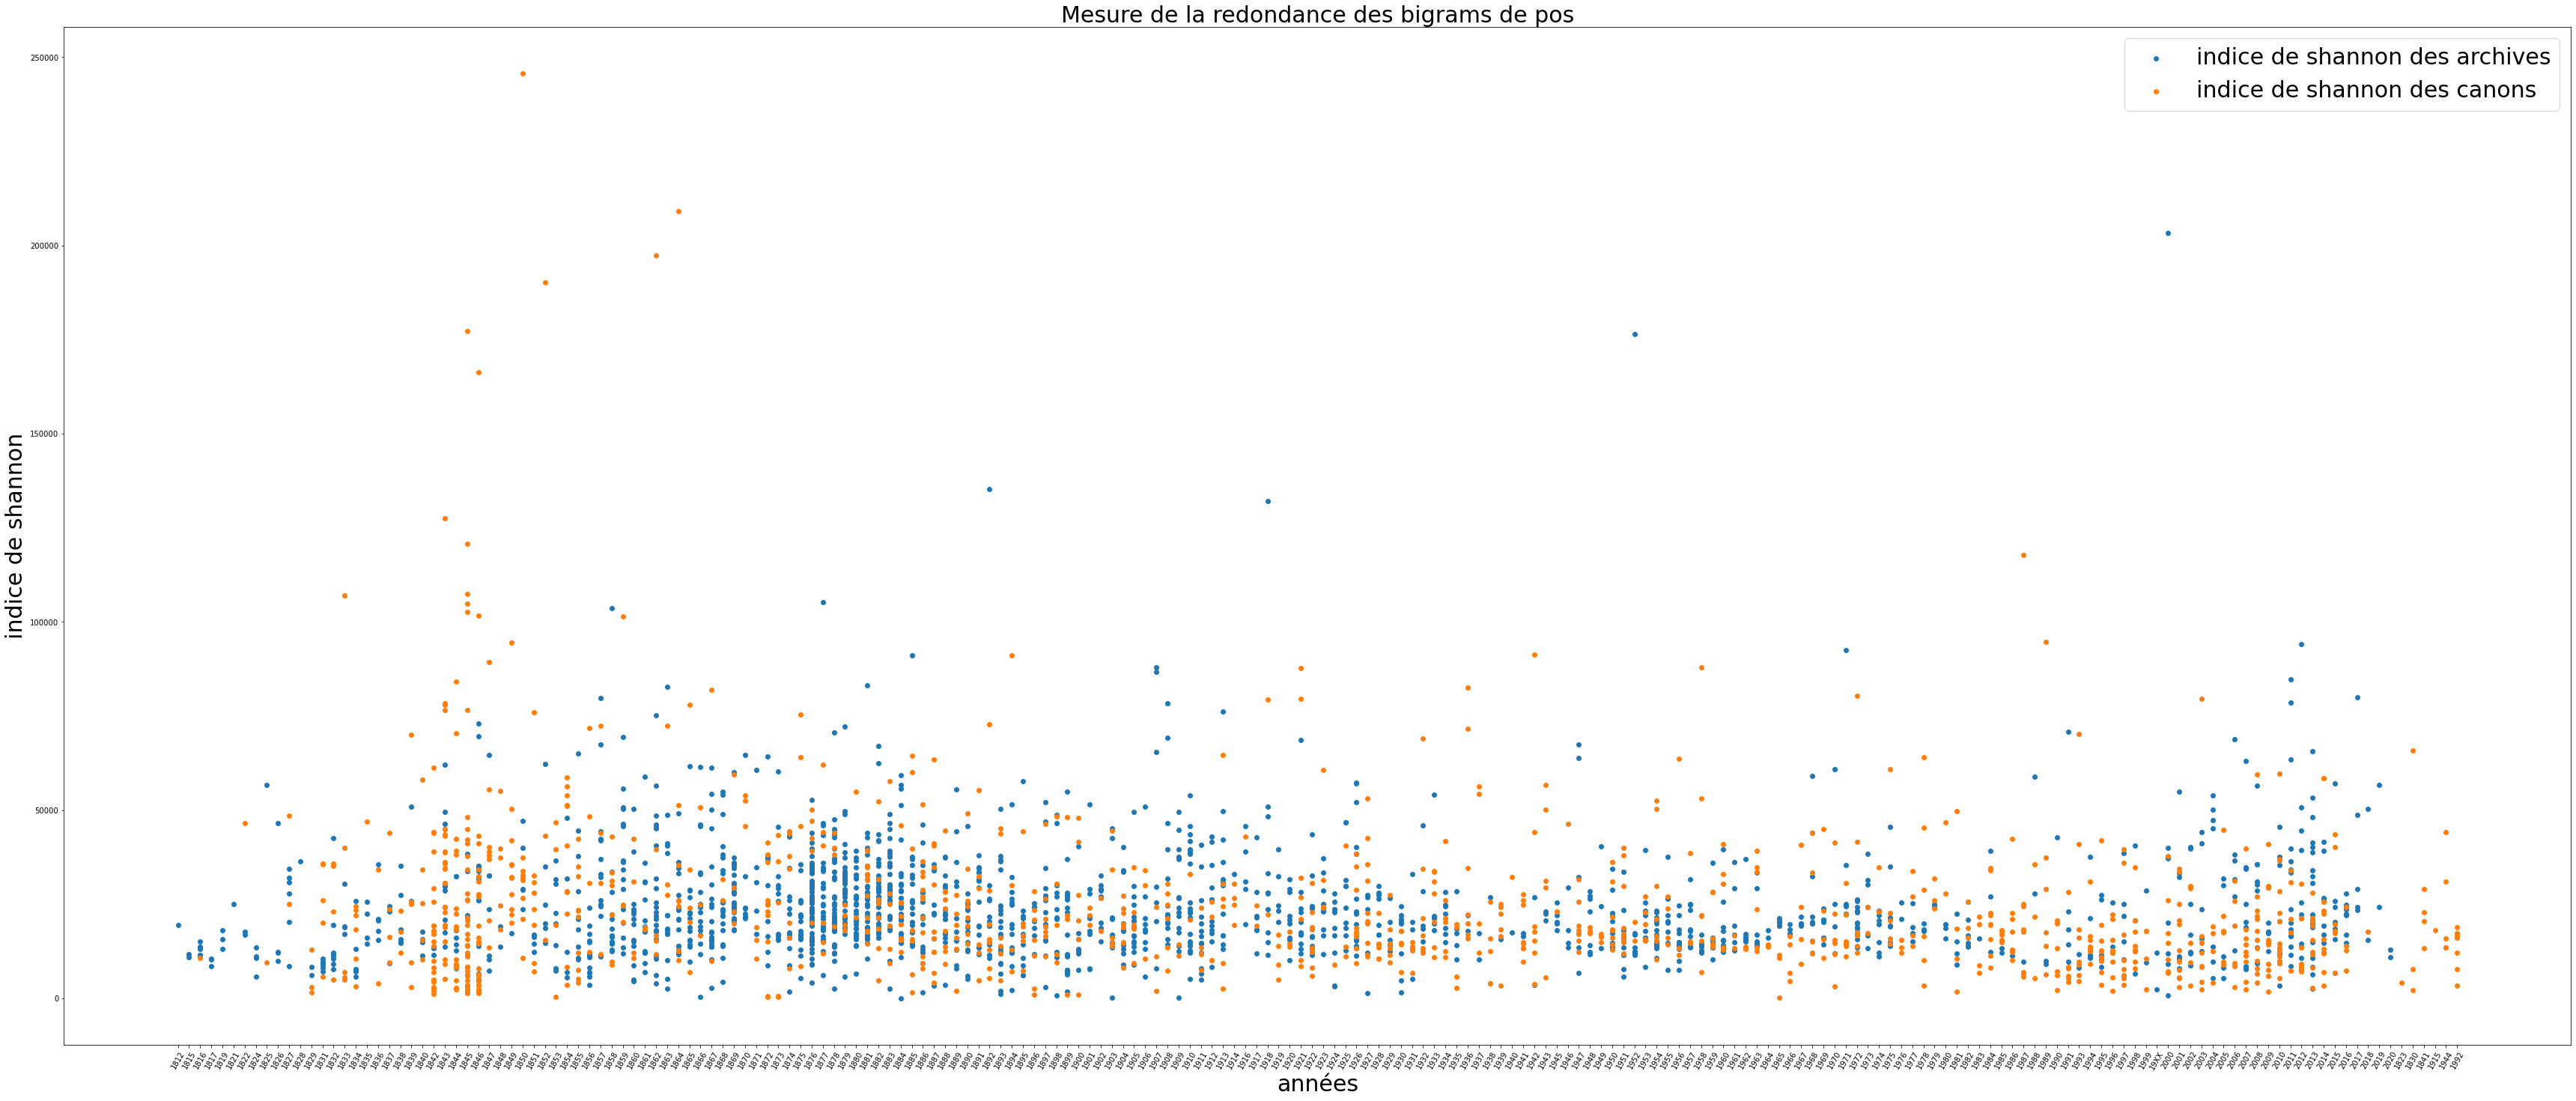

In [17]:
plt.figure(figsize=(60,25))
plt.scatter(annee_archive, shannon_archive_pos, label = 'indice de shannon des archives')
plt.scatter(annee_canon, shannon_canon_pos, label = 'indice de shannon des canons')
plt.ylabel('indice de shannon', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance des bigrams de pos', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [18]:
sum(shannon_canon_pos)/len(shannon_canon_pos)

24262.341004328988

In [19]:
sum(shannon_archive_pos)/len(shannon_archive_pos)

24482.09030973451